*Project Goal: Can machine learning produce higher returns while investing in peer to peer loans.*

**Part 1: Peer to Peer Lending Project Overview and Data Discovery**
 - Peer to Peer Lending landscape 
 - Data Discovery
 - Data Cleaning
 - Featured Engineering
 - Save Data
 - Exploratory Data Analysis (EDA)
 - EDA: Conclusion


### Peer to Peer Lending landscape:

Peer to peer lending is becoming increasingly popular for small business and consumers to procure loans at lower interest rates compared to credit cards and other alternatives. For investors, peer to peer lending can offer a higher return for non acrredited investors than fixed income investments. In this project we will look at Lending Club who has been lending since 2007. Lending Club offers loans with various grades and assigns a corresponding interest rate for investors. The higher the interest rate, the riskier the grade. The risk comes in the form of defaults. The goal of this project is to predict the default rate of a loan using machine learning models. By accurately predicting if a loan will default a significantly higher return can be achieved for an investor.

### Data Discovery:

Lending club offers a subset of their data to the public with 129 fields for each loan originated. However, not all of the fields are useful for the machine learning model. For example, Loan ID and URL cannot be used to predict default rate. Also, several fields can be used by the model to infer if the loan has been paid in full or has already defaulted. For example, investment outstanding will show that the loan has defaulted because all loans that have been fully paid will have an outstanding balance of zero. This project we will be using data is from 2007 to 2018.

Link to data and data dictionary

Link: https://www.lendingclub.com/info/download-data.action

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import CSV locations

#2007-2011
csv_2007_2011 = "../peer_to_peer_project/raw_data/lc_rawdata_2007-2011.csv"
#2012-2013
csv_2012_2013 = "../peer_to_peer_project/raw_data/lc_rawdata_2012-2013.csv"
#2014
csv_2014 = "../peer_to_peer_project/raw_data/lc_rawdata_2014.csv"
#2015
csv_2015 = "../peer_to_peer_project/raw_data/lc_rawdata_2015.csv"
#2016
csv_2016Q1 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q1.csv"
csv_2016Q2 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q2.csv"
csv_2016Q3 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q3.csv"
csv_2016Q4 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q4.csv"
#2017
csv_2017Q1 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q1.csv"
csv_2017Q2 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q2.csv"
csv_2017Q3 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q3.csv"
csv_2017Q4 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q4.csv"
#2018
csv_2018Q1 = "../peer_to_peer_project/raw_data/lc_rawdata_2018Q1.csv"
csv_2018Q2 = "../peer_to_peer_project/raw_data/lc_rawdata_2018Q2.csv"
csv_2018Q3 = "../peer_to_peer_project/raw_data/lc_rawdata_2018Q3.csv"

#import CSV as pandas data frames

#2007-2011
df_2007_2011 = pd.read_csv(csv_2007_2011, skiprows=1, parse_dates=True)
#2012-2013
df_2012_2013 = pd.read_csv(csv_2012_2013, skiprows=1, parse_dates=True)
#2014
df_2014 = pd.read_csv(csv_2014, skiprows=1, parse_dates=True)
#2015
df_2015 = pd.read_csv(csv_2015, skiprows=1, parse_dates=True)
#2016
df_2016Q1 = pd.read_csv(csv_2016Q1, skiprows=1, parse_dates=True)
df_2016Q2 = pd.read_csv(csv_2016Q2, skiprows=1, parse_dates=True)
df_2016Q3 = pd.read_csv(csv_2016Q3, skiprows=1, parse_dates=True)
df_2016Q4 = pd.read_csv(csv_2016Q4, skiprows=1, parse_dates=True)
#2017
df_2017Q1 = pd.read_csv(csv_2017Q1, skiprows=1, parse_dates=True)
df_2017Q2 = pd.read_csv(csv_2017Q2, skiprows=1, parse_dates=True)
df_2017Q3 = pd.read_csv(csv_2017Q3, skiprows=1, parse_dates=True)
df_2017Q4 = pd.read_csv(csv_2017Q4, skiprows=1, parse_dates=True)
#2018
df_2018Q1 = pd.read_csv(csv_2018Q1, skiprows=1, parse_dates=True)
df_2018Q2 = pd.read_csv(csv_2018Q2, skiprows=1, parse_dates=True)
df_2018Q3 = pd.read_csv(csv_2018Q3, skiprows=1, parse_dates=True)

#merge all data frames together 

frames = [df_2007_2011, df_2012_2013, df_2014, df_2015, df_2016Q1, 
          df_2016Q2, df_2016Q3, df_2016Q4, df_2017Q1, df_2017Q2, 
          df_2017Q3, df_2017Q4, df_2018Q1, df_2018Q2, df_2018Q3]

lending_club_data = pd.concat(frames)

lending_club_data.info()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,49,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interact

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132287 entries, 0 to 128195
Columns: 151 entries, id to settlement_term
dtypes: float64(111), object(40)
memory usage: 2.4+ GB


### Data Cleaning:

**Note:** This was an iterative process of cleaning the data and reviewing the data dictionary. It took some time to go through the data and add features that made sense during EDA and insightful for machine learning algorithm. 

In [3]:
#clean Data

lending_club_data['int_rate'].replace('%', '', regex=True, inplace=True) #remove the % sign from column
lending_club_data['loan_int_rate'] =  pd.to_numeric(lending_club_data['int_rate'])
lending_club_data['revol_util'].replace('%', '', regex=True, inplace=True) #remove the % sign from column
lending_club_data['loan_revol_util'] =  pd.to_numeric(lending_club_data['revol_util']) 
lending_club_data['int_rate'] = lending_club_data.int_rate.astype(float) #convert to float
lending_club_data['revol_util'] = lending_club_data.revol_util.astype(float) #convert to float

#filter data to 1,0 for fully paind and default/late
lending_club_data['status'] = lending_club_data.loan_status #create new column for EDA - we will convert 

#here, we are going to remove all current loans and create lables for our ML classifier - fully paid =1, defaulted, charged off, and late will =0

map_loan_status = {
'Fully Paid': 1,
'Charged Off': 0,
'Late (31-120 days)': 0,
'Default': 0,
'In Grace Period': 0,
'Late(16-30 days)': 0,
'Does not meet the credit policy. Status:Fully Paid': 2,
'Does not meet the credit policy. Status:Charged Off':2,
'nan':2,}


lending_club_data['loan_status'] = lending_club_data['loan_status'].map(map_loan_status)
lending_club_data.drop(lending_club_data[lending_club_data.loan_status == 2].index, inplace=True) # drop all all unwanted loans
lending_club_data.loan_status.dropna(inplace=True) # drop all all unwanted loans

lending_club_data.emp_length.fillna(value=0,inplace=True) #fix missing employment numbers
lending_club_data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True) #convert employment in years to numeric 
lending_club_data['emp_length'] = pd.to_numeric(lending_club_data['emp_length'])

#map term to numerical form
map_term = {
    ' 36 months':0,
    ' 60 months':1
}
lending_club_data['is_60_month_term'] = lending_club_data['term'].map(map_term)

#map verification status to numeric 
map_verification_status = {
    'Verified':1,
    'Source Verified':1,
    'Not Verified':0
}
lending_club_data['is_verified'] = lending_club_data['verification_status'].replace(map_verification_status)

#map join verification status to numeric 
map_joint_verification_status = {
    'Verified':1,
    'Source Verified':1,
    'Not Verified':0
}

lending_club_data['is_joint_verified'] = lending_club_data['verification_status_joint'].replace(map_joint_verification_status)

In [4]:
#Convert all dates to datetime format
lending_club_data['issue_d'] = lending_club_data['issue_d'].apply(pd.to_datetime)
lending_club_data['next_pymnt_d'] = lending_club_data['next_pymnt_d'].apply(pd.to_datetime)
lending_club_data['last_credit_pull_d'] = lending_club_data['last_credit_pull_d'].apply(pd.to_datetime)
lending_club_data['hardship_start_date'] = lending_club_data['hardship_start_date'].apply(pd.to_datetime)
lending_club_data['hardship_end_date'] = lending_club_data['hardship_end_date'].apply(pd.to_datetime)
lending_club_data['payment_plan_start_date'] = lending_club_data['payment_plan_start_date'].apply(pd.to_datetime)
lending_club_data['debt_settlement_flag_date'] = lending_club_data['debt_settlement_flag_date'].apply(pd.to_datetime)
lending_club_data['settlement_date'] = lending_club_data['settlement_date'].apply(pd.to_datetime)
lending_club_data['last_pymnt_d'] = lending_club_data['last_pymnt_d'].apply(pd.to_datetime)
lending_club_data['next_pymnt_d'] = lending_club_data['next_pymnt_d'].apply(pd.to_datetime)
lending_club_data['earliest_cr_line'] = lending_club_data['earliest_cr_line'].apply(pd.to_datetime)

### Featured Engineering:

Lending Club data offers little demographic information that could be useful in machine learning models. The only variable that can be used is the borrower’s state and the first three digits of their zip code. This was used to pull the mean income by zip code across the country and removing the last three digits. We then mapped the two data sets together. Then, taking the borrower’s income and subtracting the mean income gave the borrowers income in contrast to their surrounding area. Another engeneered feature was built by taking the issue date of the loan minus the borrowers first credit line. This showed how long the borrower had had an active credit line.

In [5]:
#load zip code data
excel_mean_income_by_zip_code = "../peer_to_peer_project/raw_data/LC_Zip.xlsx"
df_Mean_income_by_zip = pd.read_excel(excel_mean_income_by_zip_code)

#remove the lending club zip ending digets(xx) - LC does this to ensure anonymity of th borrower
lending_club_data['zip_code'].replace('xx', '', regex=True, inplace=True)
lending_club_data['zip_code'] = pd.to_numeric(lending_club_data['zip_code'])

#merge zip code data
lending_club_data = pd.merge(lending_club_data, df_Mean_income_by_zip, 
                             how='left', left_on='zip_code', right_on='new_xip')

#create fico mid - the data has a high and low boundry - we combine and divide by 2 to get the mid
lending_club_data['fico_mid'] = (lending_club_data.fico_range_low + lending_club_data.fico_range_high/2) 

#get the difference between the borrowers income vs the income in their zip code 
lending_club_data['income_over_zip_med_income'] = (lending_club_data.annual_inc/lending_club_data.Mean)
lending_club_data['income_min_mean_of_short_zip'] = lending_club_data['annual_inc'] - lending_club_data['Mean']

#find how long the borroer has had a credit line 
lending_club_data['issue_day_min_earliest_cr_line'] = (
lending_club_data.issue_d - lending_club_data.earliest_cr_line)/np.timedelta64(1, 'D')

### Save Data:

Save the data for use in another notebook or to quickly pick up where you left off.

In [6]:
lending_club_data.to_hdf('lc_full_data_set.h5', key='df')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->['id', 'term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'status']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


### Exploratory Data Analysis:

The fun now begins, lets explor what the data

Exploring the data will provide a clearer picture of who is lending and their characteristics. 

**We will take a look at the data in two ways:**
    - Matured Loans: These are loans that have either defaults(defaulted and late)
    - All Loans: Matured loans, late, and current
    
To look at the loans I am using the altair visualization module and find it to easily provide beautiful charts easily

Documentation Link: https://altair-viz.github.io/

In [7]:
import altair as alt 
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [8]:
lending_club_data['issue_date_year'] = lending_club_data['issue_d'].dt.year.fillna(0).astype(int)
lending_club_data['fico_mid'] = lending_club_data['fico_mid'].fillna(0).astype(int)

In [9]:
eda_group_data = lending_club_data

In [10]:
eda_group_data['status_count'] = eda_group_data.status
eda_group_data['purpose_count'] = eda_group_data.purpose
eda_group_data['loan_status_count'] = eda_group_data.loan_status
eda_group_data['fico_mid'] = eda_group_data['fico_mid'].astype(int)
eda_group_data['purpose_count'] = eda_group_data.purpose

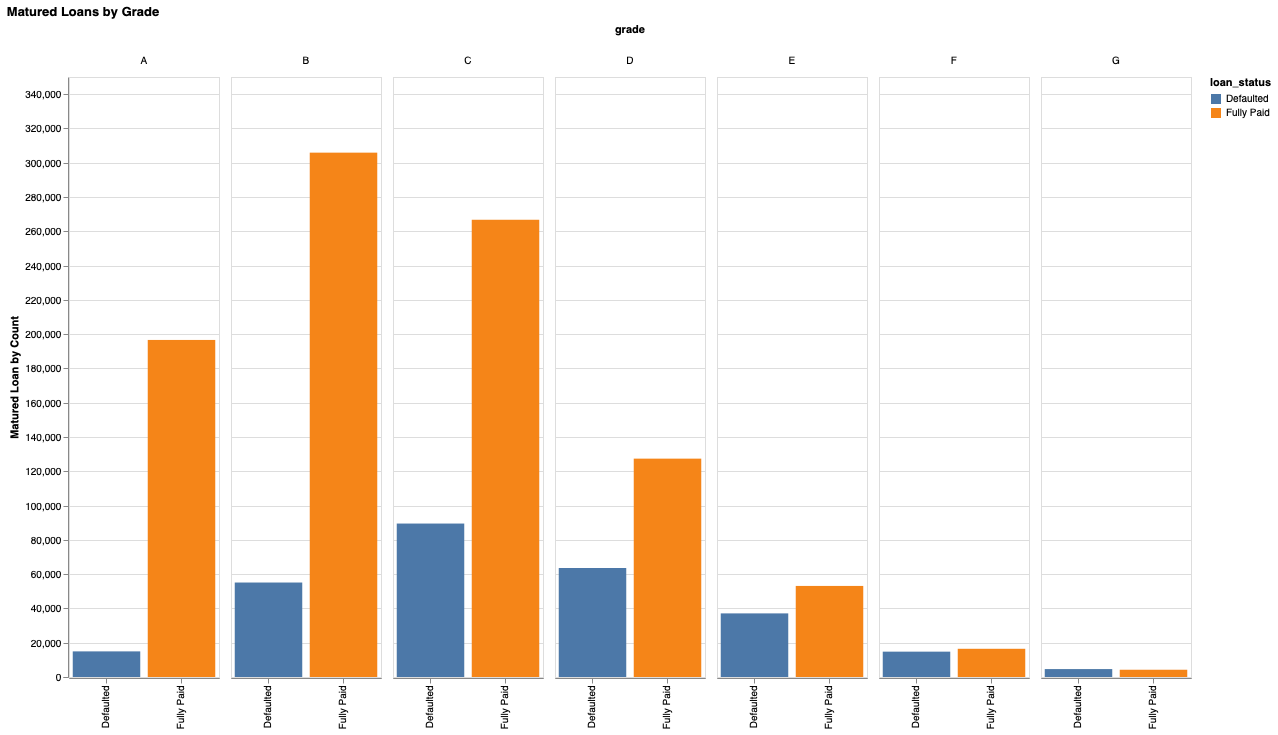

In [87]:
chart_data_default = eda_group_data.groupby(['grade', 'loan_status'
                                            ])['loan_status_count',
                                               'funded_amnt',
                                                    ].agg({ 'funded_amnt':'sum',
                                                            'loan_status_count':'count'
                                                          }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='loan_status',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Matured Loan by Count')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','funded_amnt:Q'],
).properties(width=150, height=600,title='Matured Loans by Grade')

This graph is a pretty good description of how the grade lending club applies is a predictor of whether or not the borrower will defult. **Grade F had over a 50% default rate.**

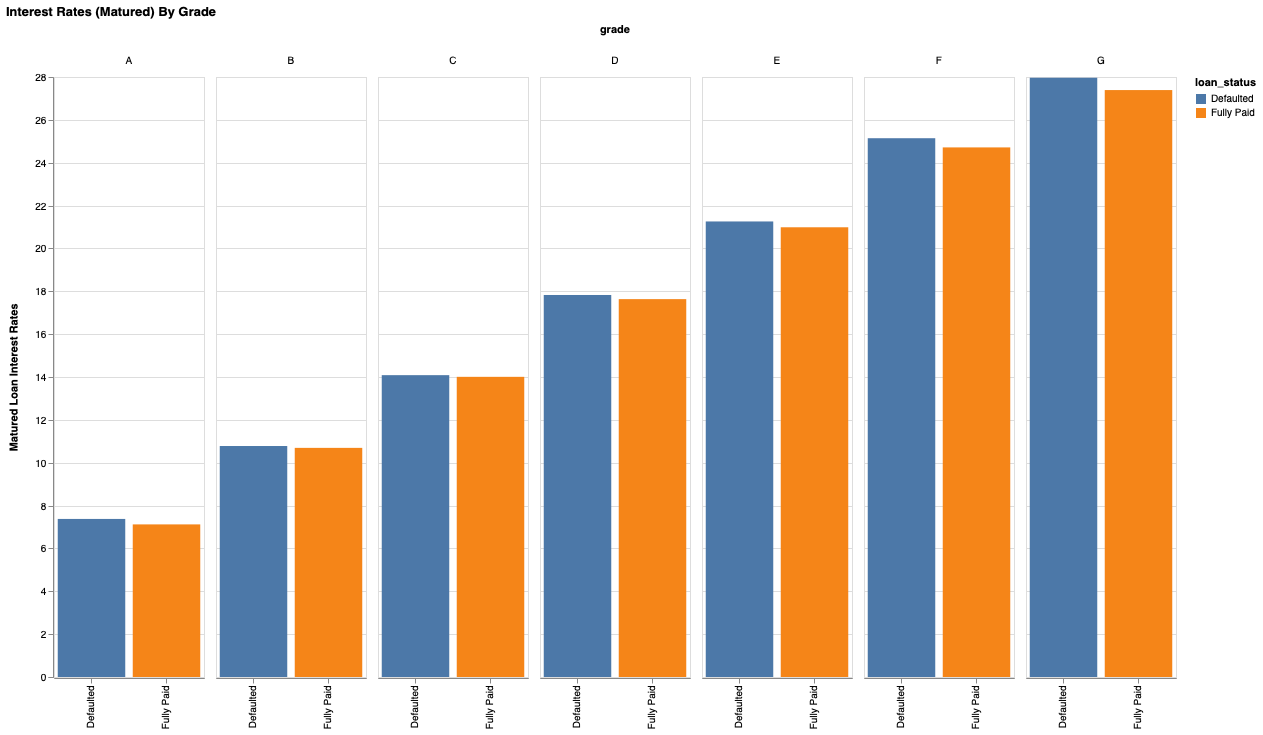

In [88]:
chart_data_default = eda_group_data.groupby(['grade', 'loan_status'
                                            ])['loan_status_count',
                                               'int_rate',
                                              ].agg({ 'loan_status_count':'count',
                                                      'int_rate':'mean'
                                                     }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='loan_status',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='int_rate',type='quantitative',axis=alt.Axis(title='Matured Loan Interest Rates')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','int_rate:Q'],
).properties(width=150, height=600,title='Interest Rates (Matured) By Grade')

As the risk increases, so does the interest rate, grade A pays much less interest and is less likely to default.

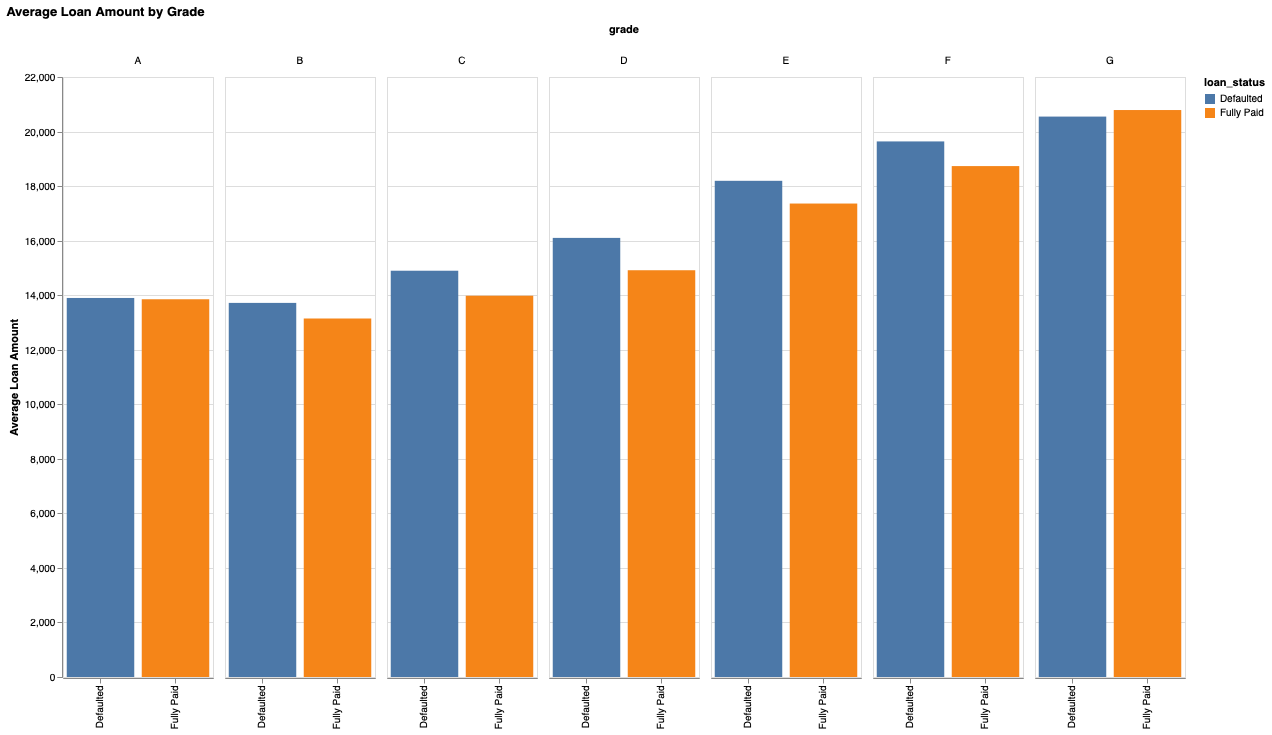

In [102]:
chart_data_default = eda_group_data.groupby(['grade', 'loan_status'])['funded_amnt'].mean().reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='loan_status',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Average Loan Amount')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'funded_amnt'],
).properties(width=150, height=600,title='Average Loan Amount by Grade')

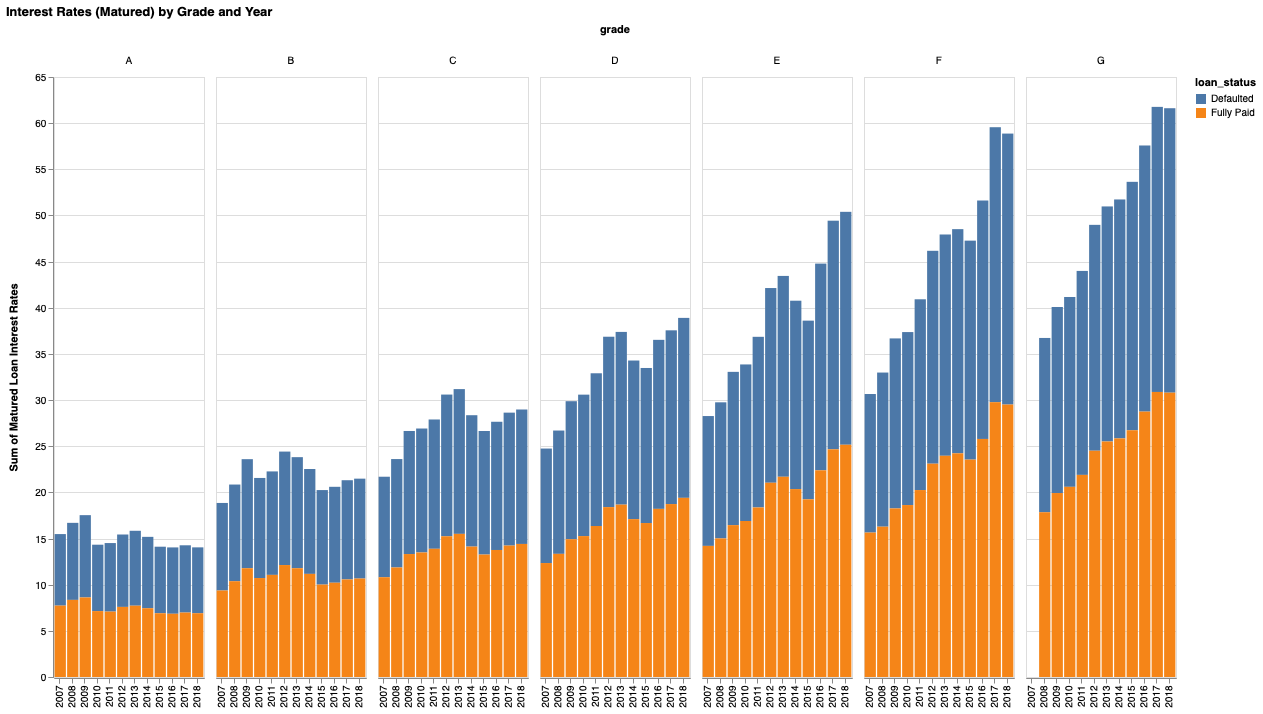

In [85]:
chart_data_default = eda_group_data.groupby(['grade', 'issue_date_year','loan_status'
                                            ])['loan_status_count',
                                               'int_rate',
                                                    ].agg({ 'int_rate':'mean',
                                                            'loan_status_count':'count'
                                                          }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='int_rate',type='quantitative',axis=alt.Axis(title='Sum of Matured Loan Interest Rates')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','int_rate:Q'],
).properties(width=150, height=600,title='Interest Rates (Matured) by Grade and Year')

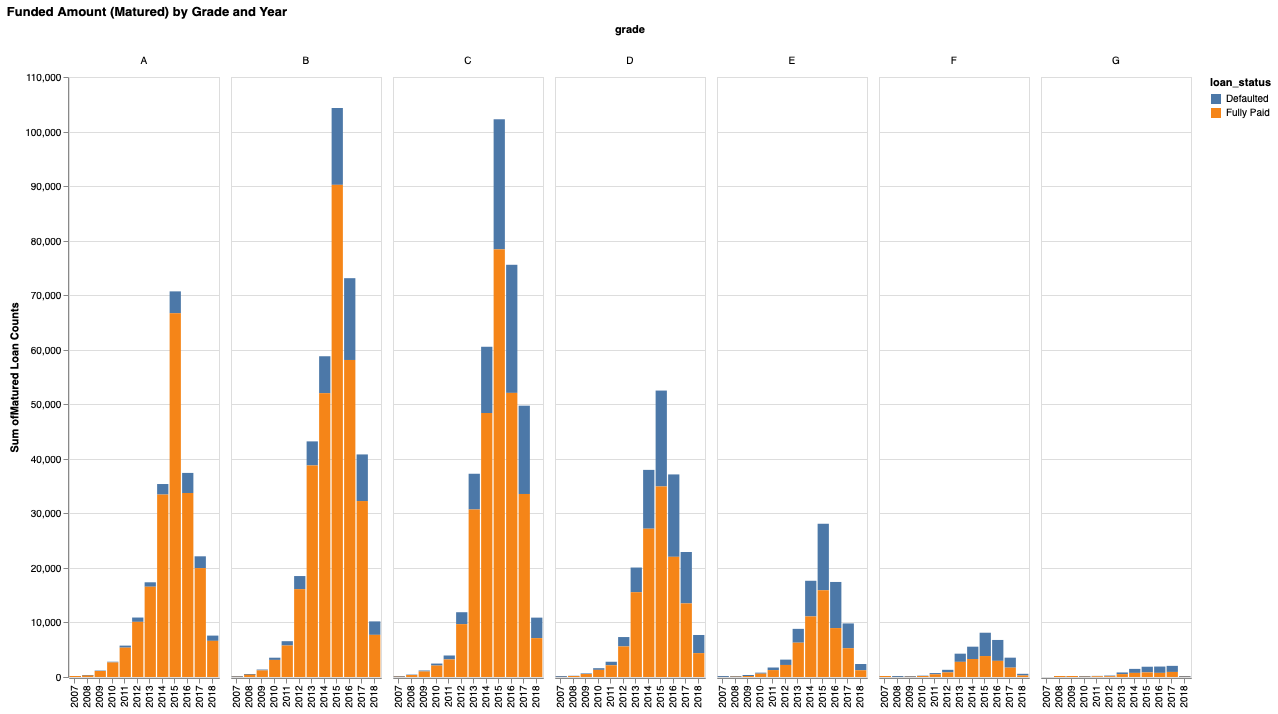

In [84]:
chart_data_default = eda_group_data.groupby(['grade', 'issue_date_year','loan_status'
                                            ])['loan_status_count',
                                               'int_rate',].agg({ 'int_rate':'mean',
                                                                  'loan_status_count':'count'
                                                                 }).reset_index()

map_default_status = {0:'Defaulted',1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Sum ofMatured Loan Counts')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','loan_status_count:Q'],
).properties(width=150, height=600,title='Funded Amount (Matured) by Grade and Year')

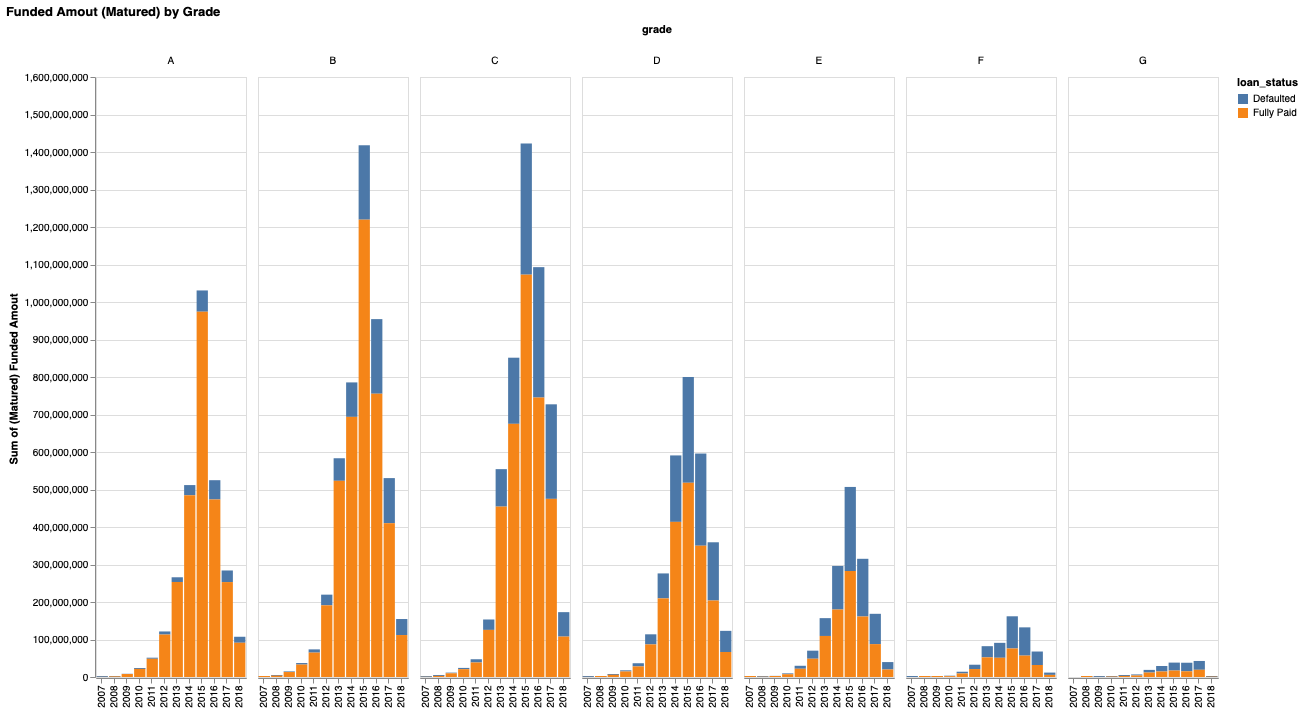

In [83]:
chart_data_default = eda_group_data.groupby(['grade', 'issue_date_year','loan_status'
                                            ])['loan_status_count','funded_amnt',
                                              ].agg({ 'funded_amnt':'sum', 
                                                      'loan_status_count':'count'
                                                    }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Sum of (Matured) Funded Amout ')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','funded_amnt:Q'],
).properties(width=150, height=600,title='Funded Amout (Matured) by Grade')

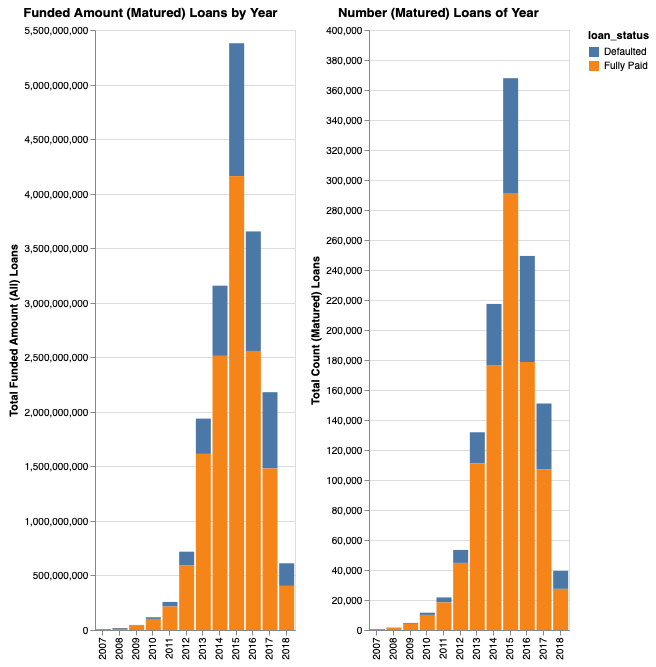

In [66]:
chart_data_default = eda_group_data.groupby(['issue_date_year','loan_status'
                                            ])['loan_status_count','funded_amnt',
                                              ].agg({ 'funded_amnt':'sum',
                                                      'loan_status_count':'count'
                                                    }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

chart_default_funded_amount_matured = alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Total Funded Amount (All) Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','funded_amnt:Q'],
).properties(width=200, height=600,title='Funded Amount (Matured) Loans by Year')

chart_data_default = eda_group_data.groupby(['issue_date_year','loan_status'
                                            ])['loan_status_count',
                                               'funded_amnt'
                                              ].agg({ 'funded_amnt':'sum',
                                                      'loan_status_count':'count'
                                                     }).reset_index()

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

chart_default_counts_matured = alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Total Count (Matured) Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','loan_status_count:Q'],
).properties(width=200, height=600,title='Number (Matured) Loans of Year')

chart_default_funded_amount_matured | chart_default_counts_matured

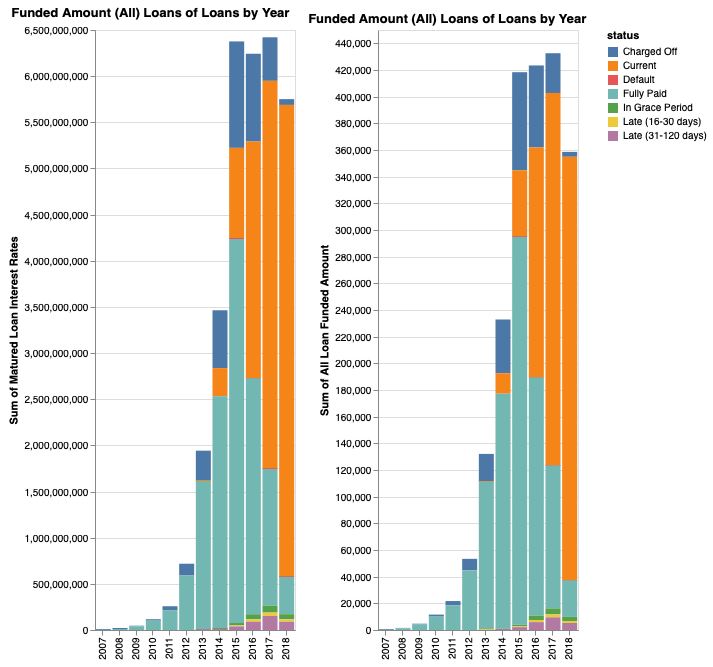

In [82]:
chart_data_default_all = eda_group_data.groupby(['issue_date_year','status'
                                            ])['id',
                                               'funded_amnt',
                                                    ].agg({ 'funded_amnt':'sum',
                                                            'id':'count'
                                                          }).reset_index()

chart_default_funded_amount = alt.Chart(chart_data_default_all).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Sum of Matured Loan Interest Rates')),
    color='status:N',
    tooltip=['status:N','funded_amnt:Q'],
).properties(width=200, height=600,title='Funded Amount (All) Loans of Loans by Year')

chart_default_count_amount = alt.Chart(chart_data_default_all).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='id',type='quantitative',axis=alt.Axis(title='Sum of All Loan Funded Amount')),
    color='status:N',
    tooltip=['status:N','id:Q'],
).properties(width=200, height=600,title='Funded Amount (All) Loans of Loans by Year')

chart_default_funded_amount | chart_default_count_amount

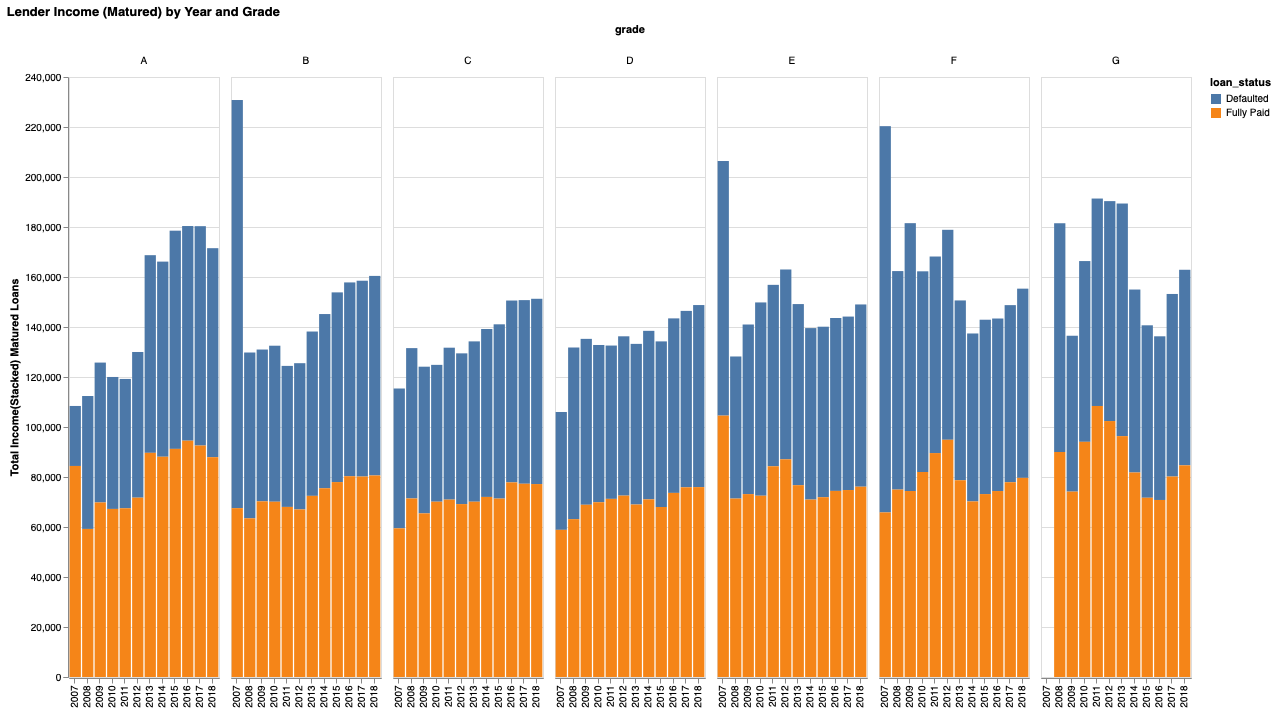

In [81]:
chart_data_default = eda_group_data.groupby(['grade', 'issue_date_year','loan_status'
                                            ])['loan_status_count','annual_inc',
                                                    ].agg({'funded_amnt':'sum',
                                                           'loan_status_count':'count',
                                                           'annual_inc':'mean'
                                                          }).reset_index()
map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='annual_inc',type='quantitative',axis=alt.Axis(title='Total Income Matured Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','annual_inc:Q'],
    column = 'grade:N',
).properties(width=150, height=600,title='Lender Income (Matured) by Year and Grade')

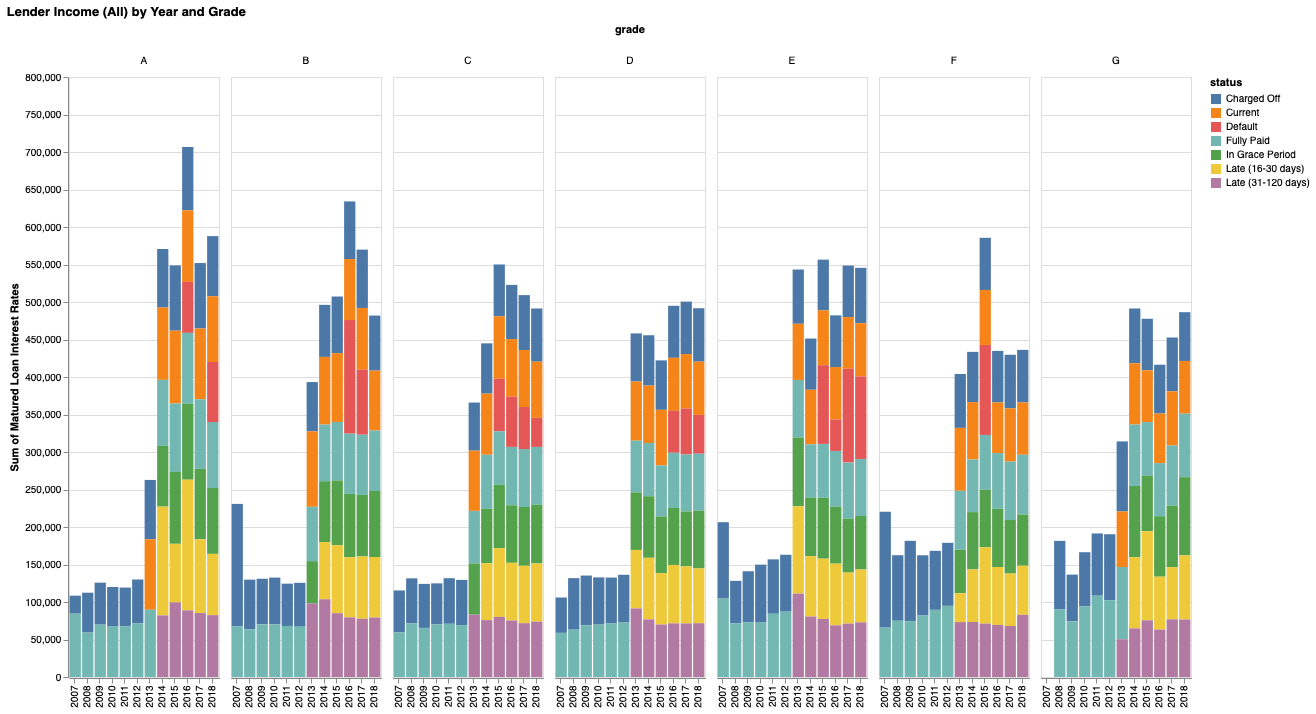

In [95]:
chart_data_default = eda_group_data.groupby(['grade','status','issue_date_year'
                                            ])['id','annual_inc',
                                              ].agg({ 'annual_inc':'mean','id':'count'
                                                     }).reset_index()

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='annual_inc',type='quantitative',axis=alt.Axis(title='Sum of Matured Loan Interest Rates')),
    color='status:N',
    tooltip=['status:N','annual_inc:Q'],
    column = 'grade:N',
).properties(width=150, height=600,title='Lender Income (All) by Year and Grade')

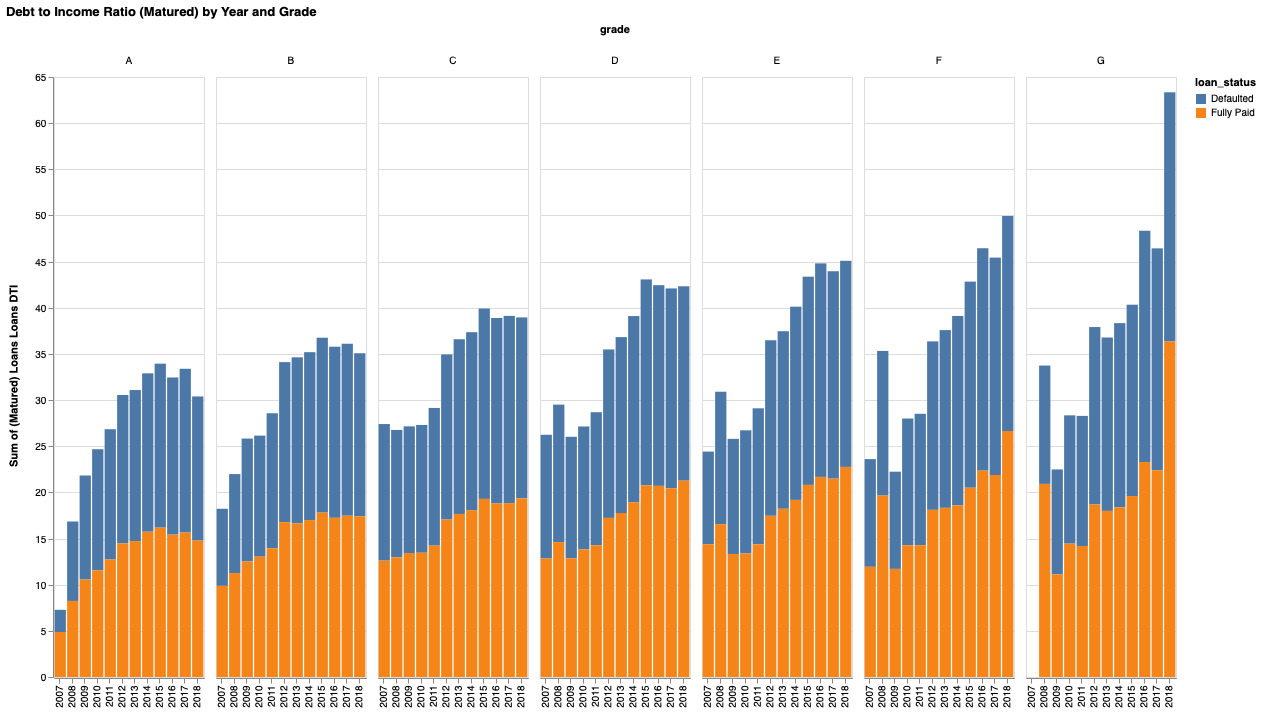

In [80]:
chart_data_default = eda_group_data.groupby(['grade', 'issue_date_year','loan_status'
                                            ])['loan_status_count','dti',
                                               ].agg({ 'funded_amnt':'sum',
                                                       'loan_status_count':'count',
                                                       'dti':'mean'
                                                      }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='dti',type='quantitative',axis=alt.Axis(title=' Sum of (Matured) Loans Loans DTI')),
    color='loan_status:N',
    tooltip=['loan_status:N','dti:Q'],
    column = 'grade:N'
).properties( width=150, height=600,title='Debt to Income Ratio (Matured) by Year and Grade') 

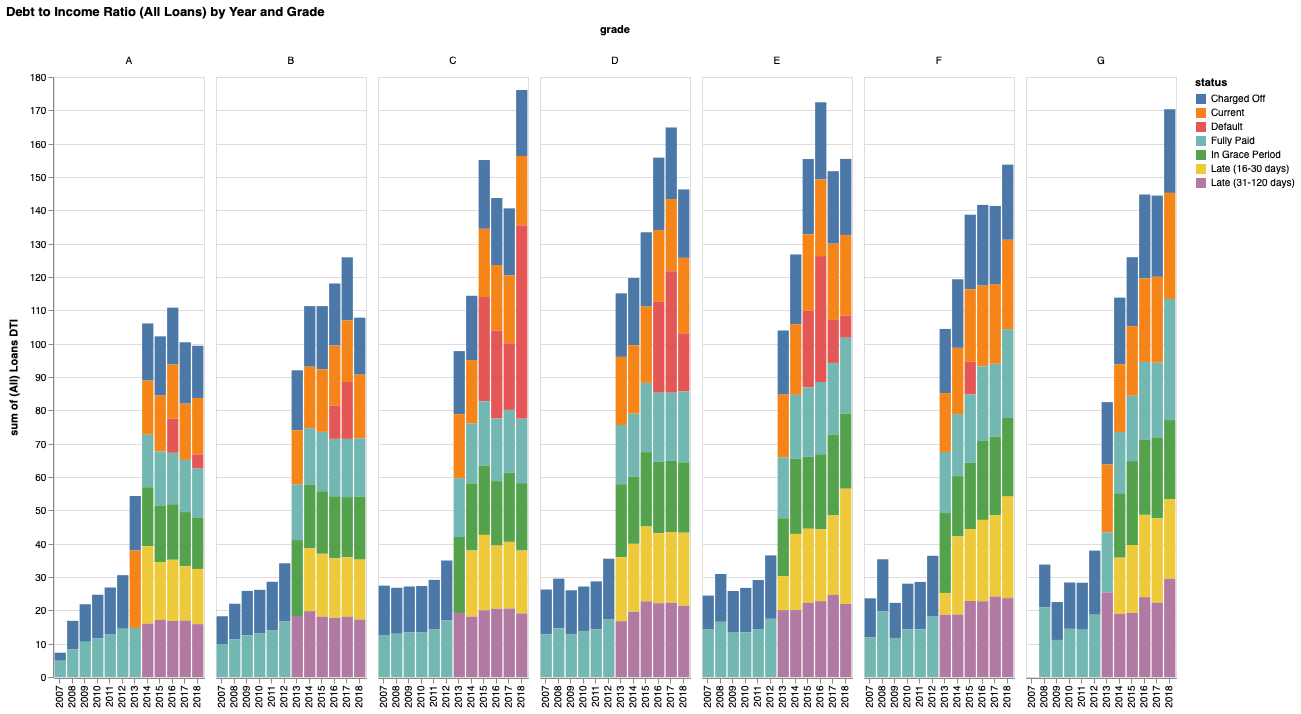

In [79]:
chart_data_default = eda_group_data.groupby(['grade','status',
                                             'issue_date_year'])['id',
                                                                 'dti'].agg({'dti':'mean', 'id':'count'
                                                                            }).reset_index()

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='dti',type='quantitative',axis=alt.Axis(title='sum of (All) Loans DTI')),
    color='status:N',
    tooltip=['status:N','dti:Q','id'],
    column = 'grade:N'
).properties(width=150, height=600,title='Debt to Income Ratio (All Loans) by Year and Grade')

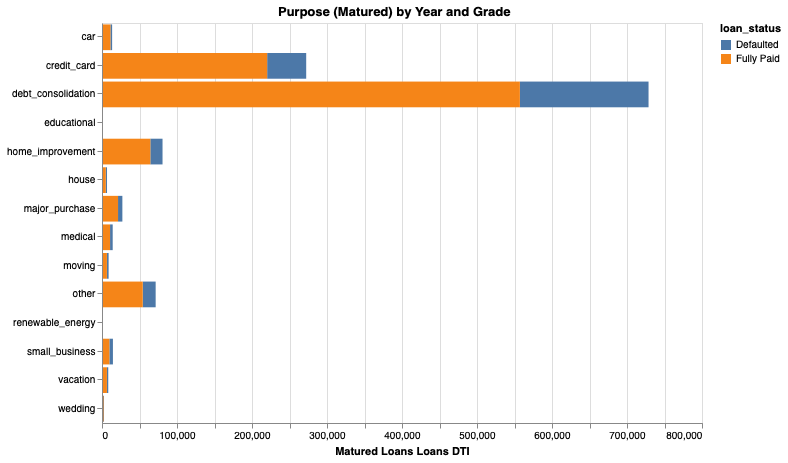

In [76]:
chart_data_default = eda_group_data.groupby(['purpose','loan_status'])['loan_status_count'].count().reset_index()
map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    y=alt.Y(field='purpose',type='nominal',axis=alt.Axis(title='')),
    x=alt.X(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Matured Loans Loans DTI')),
    color='loan_status:N',
    tooltip=['loan_status:N','annual_inc:Q']
).properties(width=600, height=400,title='Purpose (Matured) by Year and Grade')

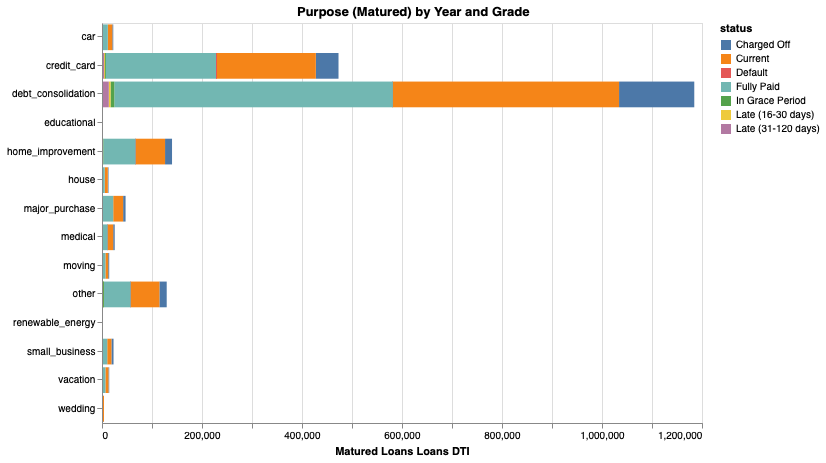

In [74]:
chart_data_default = eda_group_data.groupby(['purpose','status'])['id'].count().reset_index()

alt.Chart(chart_data_default).mark_bar().encode(
    y=alt.Y(field='purpose',type='nominal',axis=alt.Axis(title='')),
    x=alt.X(field='id',type='quantitative',axis=alt.Axis(title='Matured Loans Loans DTI')),
    color='status:N',
    tooltip=['status:N','id:Q'],
).properties(width=600, height=400,title='Purpose (Matured) by Year and Grade')

### EDA: Conclusion:

As we can see, the borrowers are diverse group and it is difficult to pinpoint a single factor that contributes to a default. Choosing between two loans by hand would be difficult. The next step will be using machine learning to simplify finding defaults and default probabilities.